In [1]:
from fastai.tabular.all import *

# Load the csv
df = pd.read_csv('./date_hood_thefts_filled.csv',
                 names=["date", "hood_id", "thefts"])
df.head()


/Users/pika/.pyenv/versions/3.9.13/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [2]:
# Transform the date column to a datetime object
make_date(df, 'date')
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [3]:
# Feature engineer the date column
add_datepart(df, 'date')
df.head()

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
1,1,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
2,2,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
3,3,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
4,4,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [4]:
# Create a data frame that only has thefts set to 0
df_0 = df[df['thefts'] == 0]

# Create a data frame where thefts are not 0
df_not_0 = df[df['thefts'] != 0]

# Create a dataframe merging df_not_0 and part of df_0
df_0 = df_0.sample(frac=0.4)
df = pd.concat([df_not_0, df_0])

# Sort the dataframe by date
df = df.sort_values(by=['Elapsed'])

df[:40]

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
99,99,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
84,84,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
1,1,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
75,75,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
39,39,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
49,49,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
55,55,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
90,90,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
150,150,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
78,78,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [5]:
# Split the data into train and validation sets where the end of the set is the validation set
splits = EndSplitter(valid_pct=0.2, valid_last=True)(range_of(df))

# Create a TabularPandas object
tabular_pandas = TabularPandas(
    df, procs=[Categorify, Normalize],
    cat_names=["hood_id", "Month", "Week", "Day", "Dayofweek", "Dayofyear", "Is_month_end",
               "Is_month_start", "Is_quarter_end", "Is_quarter_start", "Is_year_end", "Is_year_start"],
    cont_names=["Year"],
    y_names="thefts", y_block=CategoryBlock,
    splits=splits)

tabular_pandas.xs.iloc[:5]


,hood_id,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Year
99,100,1,1,1,4,1,1,2,1,2,1,2,-1.473383
84,85,1,1,1,4,1,1,2,1,2,1,2,-1.473383
1,2,1,1,1,4,1,1,2,1,2,1,2,-1.473383
75,76,1,1,1,4,1,1,2,1,2,1,2,-1.473383
39,40,1,1,1,4,1,1,2,1,2,1,2,-1.473383


In [46]:
# Set the batch size
data_loader = tabular_pandas.dataloaders(bs=800)
data_loader.show_batch()

,hood_id,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Year,thefts
0,98,5,20,16,1,136,False,False,False,False,False,False,2017.0,1
1,143,9,36,11,6,255,False,False,False,False,False,False,2016.0,0
2,45,5,20,16,1,136,False,False,False,False,False,False,2017.0,1
3,121,10,40,2,4,276,False,False,False,False,False,False,2020.0,0
4,131,2,5,3,5,34,False,False,False,False,False,False,2018.0,0
5,20,7,26,1,4,183,False,True,False,True,False,False,2016.0,0
6,78,6,26,27,5,179,False,False,False,False,False,False,2020.0,0
7,121,3,12,17,1,76,False,False,False,False,False,False,2015.0,0
8,27,4,16,19,3,109,False,False,False,False,False,False,2018.0,0
9,59,12,50,16,5,350,False,False,False,False,False,False,2017.0,0


In [47]:
# Create a model with cross entropy loss
learn = tabular_learner(data_loader, y_range=(
    0, 4), loss_func=FocalLossFlat(), metrics=accuracy)


In [48]:
# Train the model
learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,accuracy,time
0,0.925880,1.528975,0.180224,00:07
1,0.522105,1.242945,0.229506,00:07
2,0.489419,1.238934,0.229434,00:07
3,0.480965,1.241402,0.229748,00:07
4,0.479072,1.228804,0.229724,00:07
5,0.316440,0.349274,0.737994,00:07
6,0.279227,0.334154,0.741143,00:07
7,0.274253,0.325845,0.742208,00:07
8,0.270686,0.335201,0.739205,00:07
9,0.262967,0.338598,0.737655,00:07


In [49]:
# Show the results
learn.show_results(max_n=100, shuffle=True)


,hood_id,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Year,thefts,thefts_pred
0,66.0,12.0,52.0,28.0,2.0,362.0,1.0,1.0,1.0,1.0,1.0,1.0,2.040382,0.0,0.0
1,99.0,11.0,47.0,27.0,6.0,331.0,1.0,1.0,1.0,1.0,1.0,1.0,2.040382,1.0,0.0
2,159.0,4.0,14.0,5.0,2.0,95.0,1.0,1.0,1.0,1.0,1.0,1.0,2.626009,0.0,0.0
3,40.0,4.0,14.0,6.0,2.0,96.0,1.0,1.0,1.0,1.0,1.0,1.0,2.040382,0.0,0.0
4,87.0,2.0,7.0,20.0,6.0,51.0,1.0,1.0,1.0,1.0,1.0,1.0,2.040382,0.0,0.0
5,159.0,6.0,25.0,24.0,5.0,175.0,1.0,1.0,1.0,1.0,1.0,1.0,2.626009,0.0,0.0
6,108.0,8.0,35.0,30.0,1.0,242.0,1.0,1.0,1.0,1.0,1.0,1.0,2.040382,0.0,0.0
7,9.0,5.0,19.0,10.0,1.0,130.0,1.0,1.0,1.0,1.0,1.0,1.0,2.040382,0.0,0.0
8,97.0,7.0,28.0,18.0,7.0,199.0,1.0,1.0,1.0,1.0,1.0,1.0,2.040382,0.0,0.0
9,134.0,5.0,21.0,30.0,7.0,150.0,1.0,1.0,1.0,1.0,1.0,1.0,2.040382,0.0,0.0


In [50]:
# Get the predictions and target values
preds, targs = learn.get_preds()
print(preds)
print(targs)


tensor([[0.7931, 0.1474, 0.0155, 0.0146, 0.0146, 0.0146],
        [0.9152, 0.0169, 0.0169, 0.0170, 0.0170, 0.0169],
        [0.7833, 0.1569, 0.0162, 0.0146, 0.0145, 0.0145],
        ...,
        [0.0194, 0.8997, 0.0229, 0.0194, 0.0194, 0.0194],
        [0.6413, 0.3024, 0.0147, 0.0139, 0.0138, 0.0138],
        [0.4581, 0.4834, 0.0189, 0.0132, 0.0132, 0.0132]])
tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [2],
        [1]], dtype=torch.int8)


In [51]:
# Get the highest value from the predictions tensor
preds = preds.argmax(dim=-1)
print(preds)

tensor([0, 0, 0,  ..., 1, 0, 1])


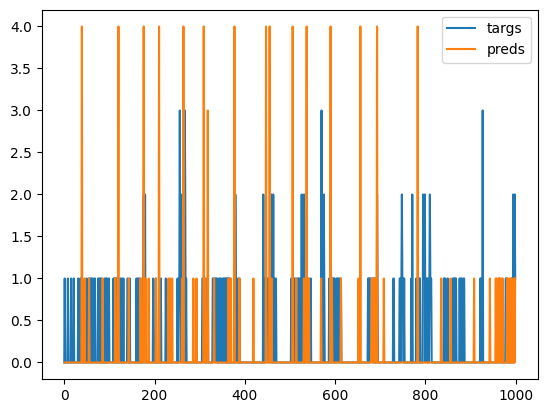

In [52]:
# Plot only the highest predictions vs target in a line plot las 4000 values
plt.plot(targs[-1000:].numpy(), label='targs')
plt.plot(preds[-1000:].numpy(), label='preds')
plt.legend()
plt.show()

In [24]:
# With sckiit-learn calculate the mean squared error and accuracy
from sklearn.metrics import mean_squared_error, accuracy_score

# Round the predictions to the nearest integer
preds = np.round(preds)

print('Mean squared error: ', mean_squared_error(targs, preds))
print('Accuracy: ', accuracy_score(targs, preds))

Mean squared error:  0.3232266970188652
Accuracy:  0.7446056232291187


In [ ]:
# Export the model
learn.export('./exported_models/74_fill_imbalance.pkl')